### attempt at loading a wrf file with yt-xarray

relies on current dev branch of yt-xarray

In [6]:
import yt
import yt_xarray
import xarray as xr

ds = yt_xarray.open_dataset('wrf/wrfout_d03_2016-06-01.nc')

wrf coordinates are a bit different... e.g., the temperature field in this data:

In [7]:
ds.T

<xarray.DataArray 'T' (Time: 24, bottom_top: 39, south_north: 252,
                       west_east: 252)>
[59439744 values with dtype=float32]
Coordinates:
    XLAT     (Time, south_north, west_east) float32 ...
    XLONG    (Time, south_north, west_east) float32 ...
    XTIME    (Time) datetime64[ns] ...
Dimensions without coordinates: Time, bottom_top, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  perturbation potential temperature theta-t0
    units:        K
    stagger:

has coords and dimensions of

In [8]:
ds.T.coords

Coordinates:
    XLAT     (Time, south_north, west_east) float32 ...
    XLONG    (Time, south_north, west_east) float32 ...
    XTIME    (Time) datetime64[ns] 2016-06-01 ... 2016-06-01T23:00:00

In [9]:
ds.T.dims

('Time', 'bottom_top', 'south_north', 'west_east')

yt-xarray won't know how to handle these coordinates out of the box... so we'll need to add some aliases. 

Since I'm working in a virtual environment without cartopy, I'm just going to treat this data as cartesian to show how to load into yt-xarray. We'll map the dims as follows:

* `bottom_top` to `z`
* `south_north` to `y`
* `west_east` to `x`

We can simply add this mapping to the `yt_xarray.known_coord_aliases` dictionary:

In [10]:
known_coords = yt_xarray.known_coord_aliases
known_coords['bottom_top'] = 'z' 
known_coords['south_north'] = 'y'
known_coords['west_east'] = 'x' 

if we were treating the data as proper geogrpahic dataset, would would have added:

```python
known_coords['bottom_top'] = 'alitude' 
known_coords['south_north'] = 'latitude'
known_coords['west_east'] = 'longitude'
```

Since this file has fields with different dimensionality, we'll have to use one of the `load_grid_` methods directly rather than the `ds()` attribute. We also will want to specify a selection dictionary with the time index we want to load and we'll need a `length_unit` as well (set this to 1 since we're loading in cartesian and the lengths will not really make sense anyway): 

In [14]:
ds_yt = ds.yt.load_grid_from_callable(fields=["T"],sel_dict={'Time':0}, length_unit=1, geometry='cartesian')

yt : [INFO     ] 2022-12-14 16:47:32,971 Parameters: current_time              = 0
yt : [INFO     ] 2022-12-14 16:47:32,972 Parameters: domain_dimensions         = [ 39 252 252]
yt : [INFO     ] 2022-12-14 16:47:32,974 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-12-14 16:47:32,975 Parameters: domain_right_edge         = [ 38. 251. 251.]
yt : [INFO     ] 2022-12-14 16:47:32,976 Parameters: cosmological_simulation   = 0


('cartesian', ['z', 'y', 'x'])


In [16]:
ds_yt.field_list

[('stream', 'T')]

yt : [INFO     ] 2022-12-14 16:47:35,123 xlim = 0.000000 251.000000
yt : [INFO     ] 2022-12-14 16:47:35,124 ylim = 0.000000 251.000000
yt : [INFO     ] 2022-12-14 16:47:35,127 xlim = 0.000000 251.000000
yt : [INFO     ] 2022-12-14 16:47:35,129 ylim = 0.000000 251.000000
yt : [INFO     ] 2022-12-14 16:47:35,140 Making a fixed resolution buffer of (('stream', 'T')) 800 by 800



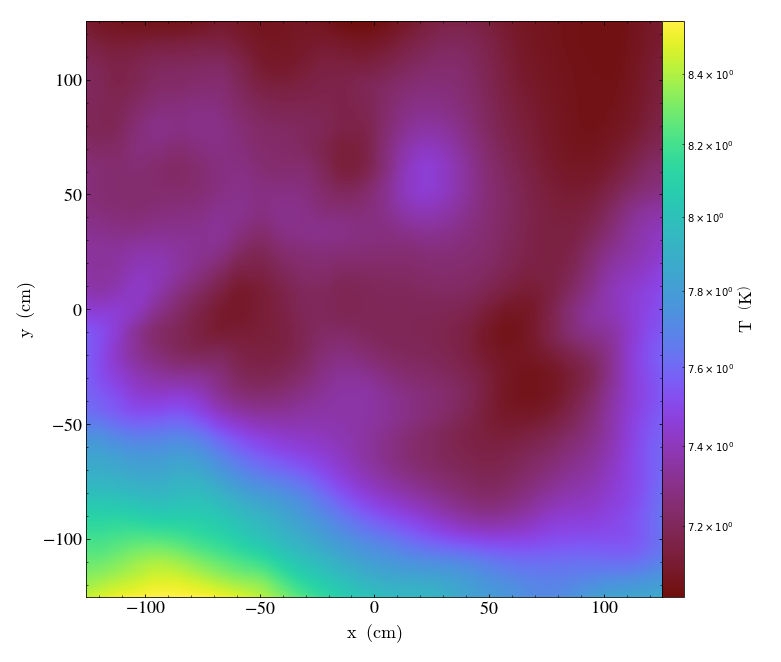

In [15]:
yt.SlicePlot(ds_yt, "z", ("stream", "T"))

yt : [INFO     ] 2022-12-14 16:52:18,845 Parameters: current_time              = 0
yt : [INFO     ] 2022-12-14 16:52:18,848 Parameters: domain_dimensions         = [ 39 252 252]
yt : [INFO     ] 2022-12-14 16:52:18,852 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-12-14 16:52:18,855 Parameters: domain_right_edge         = [ 38. 251. 251.]
yt : [INFO     ] 2022-12-14 16:52:18,857 Parameters: cosmological_simulation   = 0


('cartesian', ['z', 'y', 'x'])


yt : [INFO     ] 2022-12-14 16:52:19,122 xlim = 0.000000 251.000000
yt : [INFO     ] 2022-12-14 16:52:19,123 ylim = 0.000000 251.000000
yt : [INFO     ] 2022-12-14 16:52:19,125 xlim = 0.000000 251.000000
yt : [INFO     ] 2022-12-14 16:52:19,125 ylim = 0.000000 251.000000
yt : [INFO     ] 2022-12-14 16:52:19,134 Making a fixed resolution buffer of (('stream', 'T')) 800 by 800
yt : [INFO     ] 2022-12-14 16:52:19,370 Parameters: current_time              = 6
yt : [INFO     ] 2022-12-14 16:52:19,372 Parameters: domain_dimensions         = [ 39 252 252]
yt : [INFO     ] 2022-12-14 16:52:19,374 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-12-14 16:52:19,376 Parameters: domain_right_edge         = [ 38. 251. 251.]
yt : [INFO     ] 2022-12-14 16:52:19,377 Parameters: cosmological_simulation   = 0


('cartesian', ['z', 'y', 'x'])


yt : [INFO     ] 2022-12-14 16:52:19,645 xlim = 0.000000 251.000000
yt : [INFO     ] 2022-12-14 16:52:19,646 ylim = 0.000000 251.000000
yt : [INFO     ] 2022-12-14 16:52:19,648 xlim = 0.000000 251.000000
yt : [INFO     ] 2022-12-14 16:52:19,649 ylim = 0.000000 251.000000
yt : [INFO     ] 2022-12-14 16:52:19,658 Making a fixed resolution buffer of (('stream', 'T')) 800 by 800
yt : [INFO     ] 2022-12-14 16:52:20,268 Parameters: current_time              = 12
yt : [INFO     ] 2022-12-14 16:52:20,270 Parameters: domain_dimensions         = [ 39 252 252]
yt : [INFO     ] 2022-12-14 16:52:20,272 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-12-14 16:52:20,274 Parameters: domain_right_edge         = [ 38. 251. 251.]
yt : [INFO     ] 2022-12-14 16:52:20,275 Parameters: cosmological_simulation   = 0


('cartesian', ['z', 'y', 'x'])


yt : [INFO     ] 2022-12-14 16:52:20,523 xlim = 0.000000 251.000000
yt : [INFO     ] 2022-12-14 16:52:20,525 ylim = 0.000000 251.000000
yt : [INFO     ] 2022-12-14 16:52:20,526 xlim = 0.000000 251.000000
yt : [INFO     ] 2022-12-14 16:52:20,527 ylim = 0.000000 251.000000
yt : [INFO     ] 2022-12-14 16:52:20,539 Making a fixed resolution buffer of (('stream', 'T')) 800 by 800
yt : [INFO     ] 2022-12-14 16:52:20,786 Parameters: current_time              = 18
yt : [INFO     ] 2022-12-14 16:52:20,788 Parameters: domain_dimensions         = [ 39 252 252]
yt : [INFO     ] 2022-12-14 16:52:20,790 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-12-14 16:52:20,791 Parameters: domain_right_edge         = [ 38. 251. 251.]
yt : [INFO     ] 2022-12-14 16:52:20,793 Parameters: cosmological_simulation   = 0


('cartesian', ['z', 'y', 'x'])


yt : [INFO     ] 2022-12-14 16:52:21,018 xlim = 0.000000 251.000000
yt : [INFO     ] 2022-12-14 16:52:21,020 ylim = 0.000000 251.000000
yt : [INFO     ] 2022-12-14 16:52:21,021 xlim = 0.000000 251.000000
yt : [INFO     ] 2022-12-14 16:52:21,022 ylim = 0.000000 251.000000
yt : [INFO     ] 2022-12-14 16:52:21,035 Making a fixed resolution buffer of (('stream', 'T')) 800 by 800



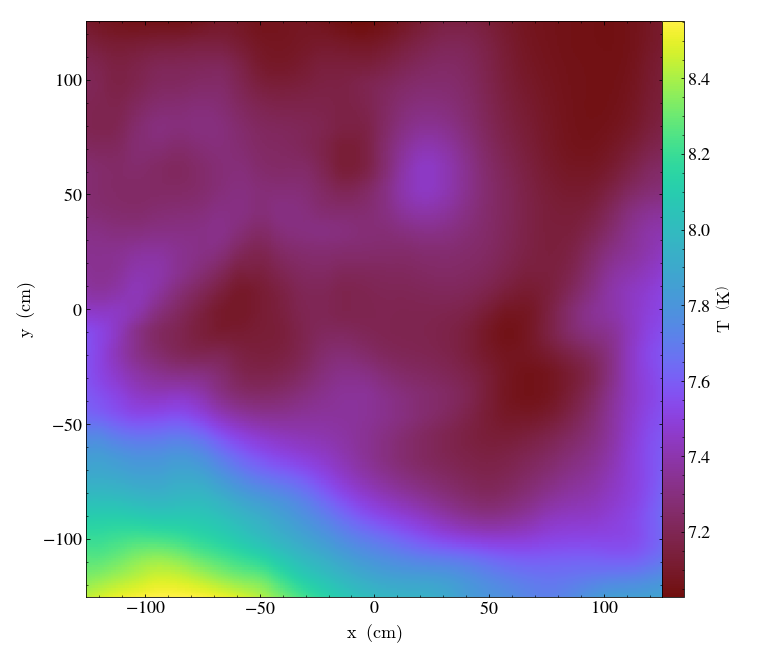


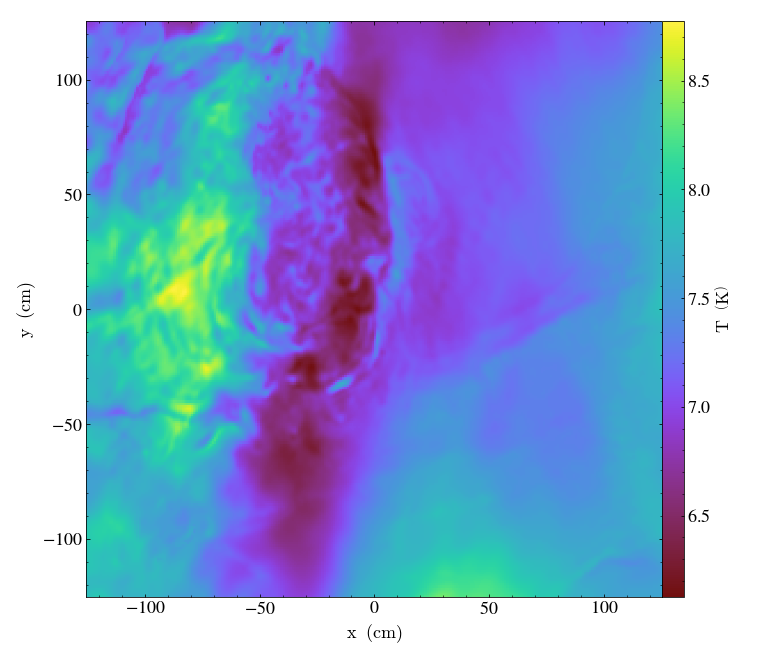


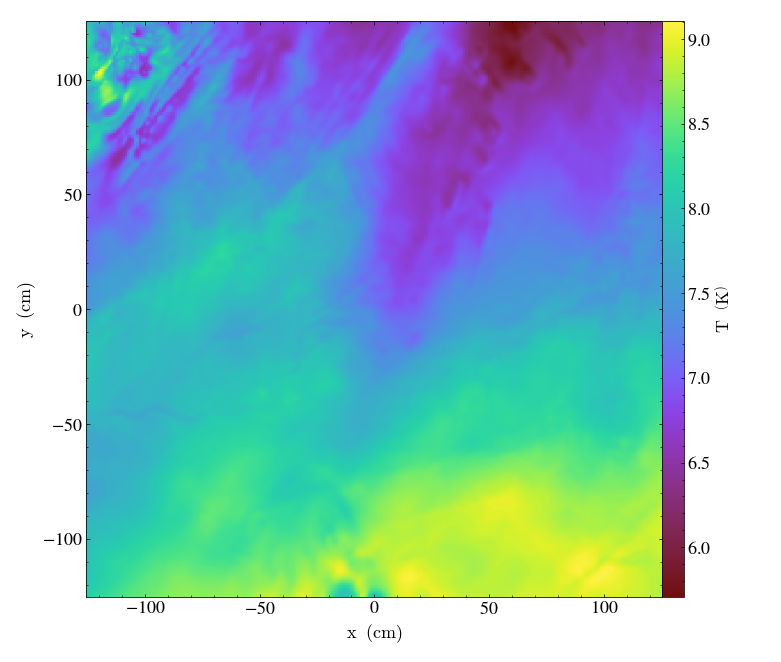


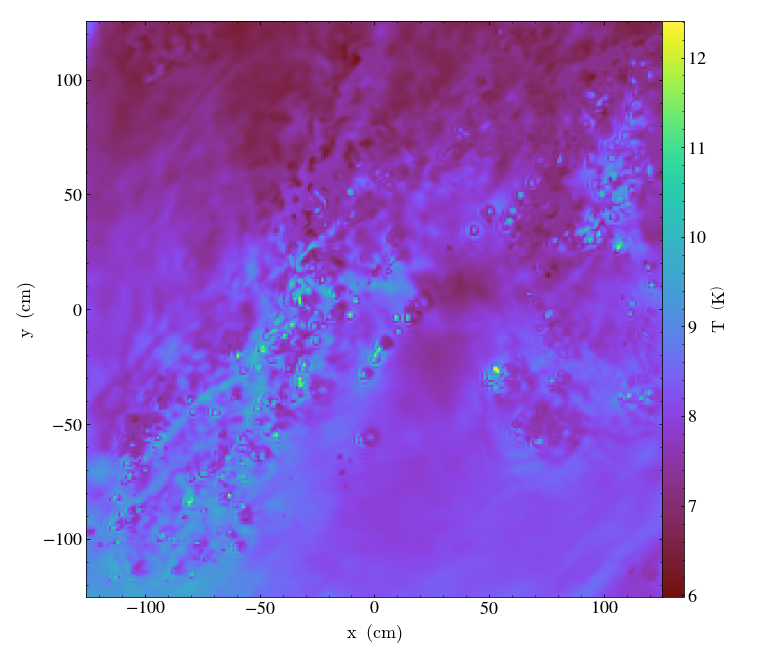

In [21]:
slcs = []
ds_obs = []
for time_index in range(0, 24, 6):
    ds_obs.append(ds.yt.load_grid_from_callable(fields=["T"],sel_dict={'Time':time_index}, length_unit=1, geometry='cartesian'))
    slc = yt.SlicePlot(ds_obs[-1], "z", ("stream", "T"))
    slc.set_log(("stream", "T"), False)
    slcs.append(slc)
    
for slc in slcs:
    slc.show()